# **Prediction Using Descision Tree**

> Author Aqsa Rasheed



## **Intermediate Level**

**Classifiaction Based Problem**

Create a descision tree and visualize it with a purpose if we feed any new data it would be able to classify correctly.
Dataset: Iris



In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset directly from sklearn
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
print("successfully imported")


successfully imported


In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


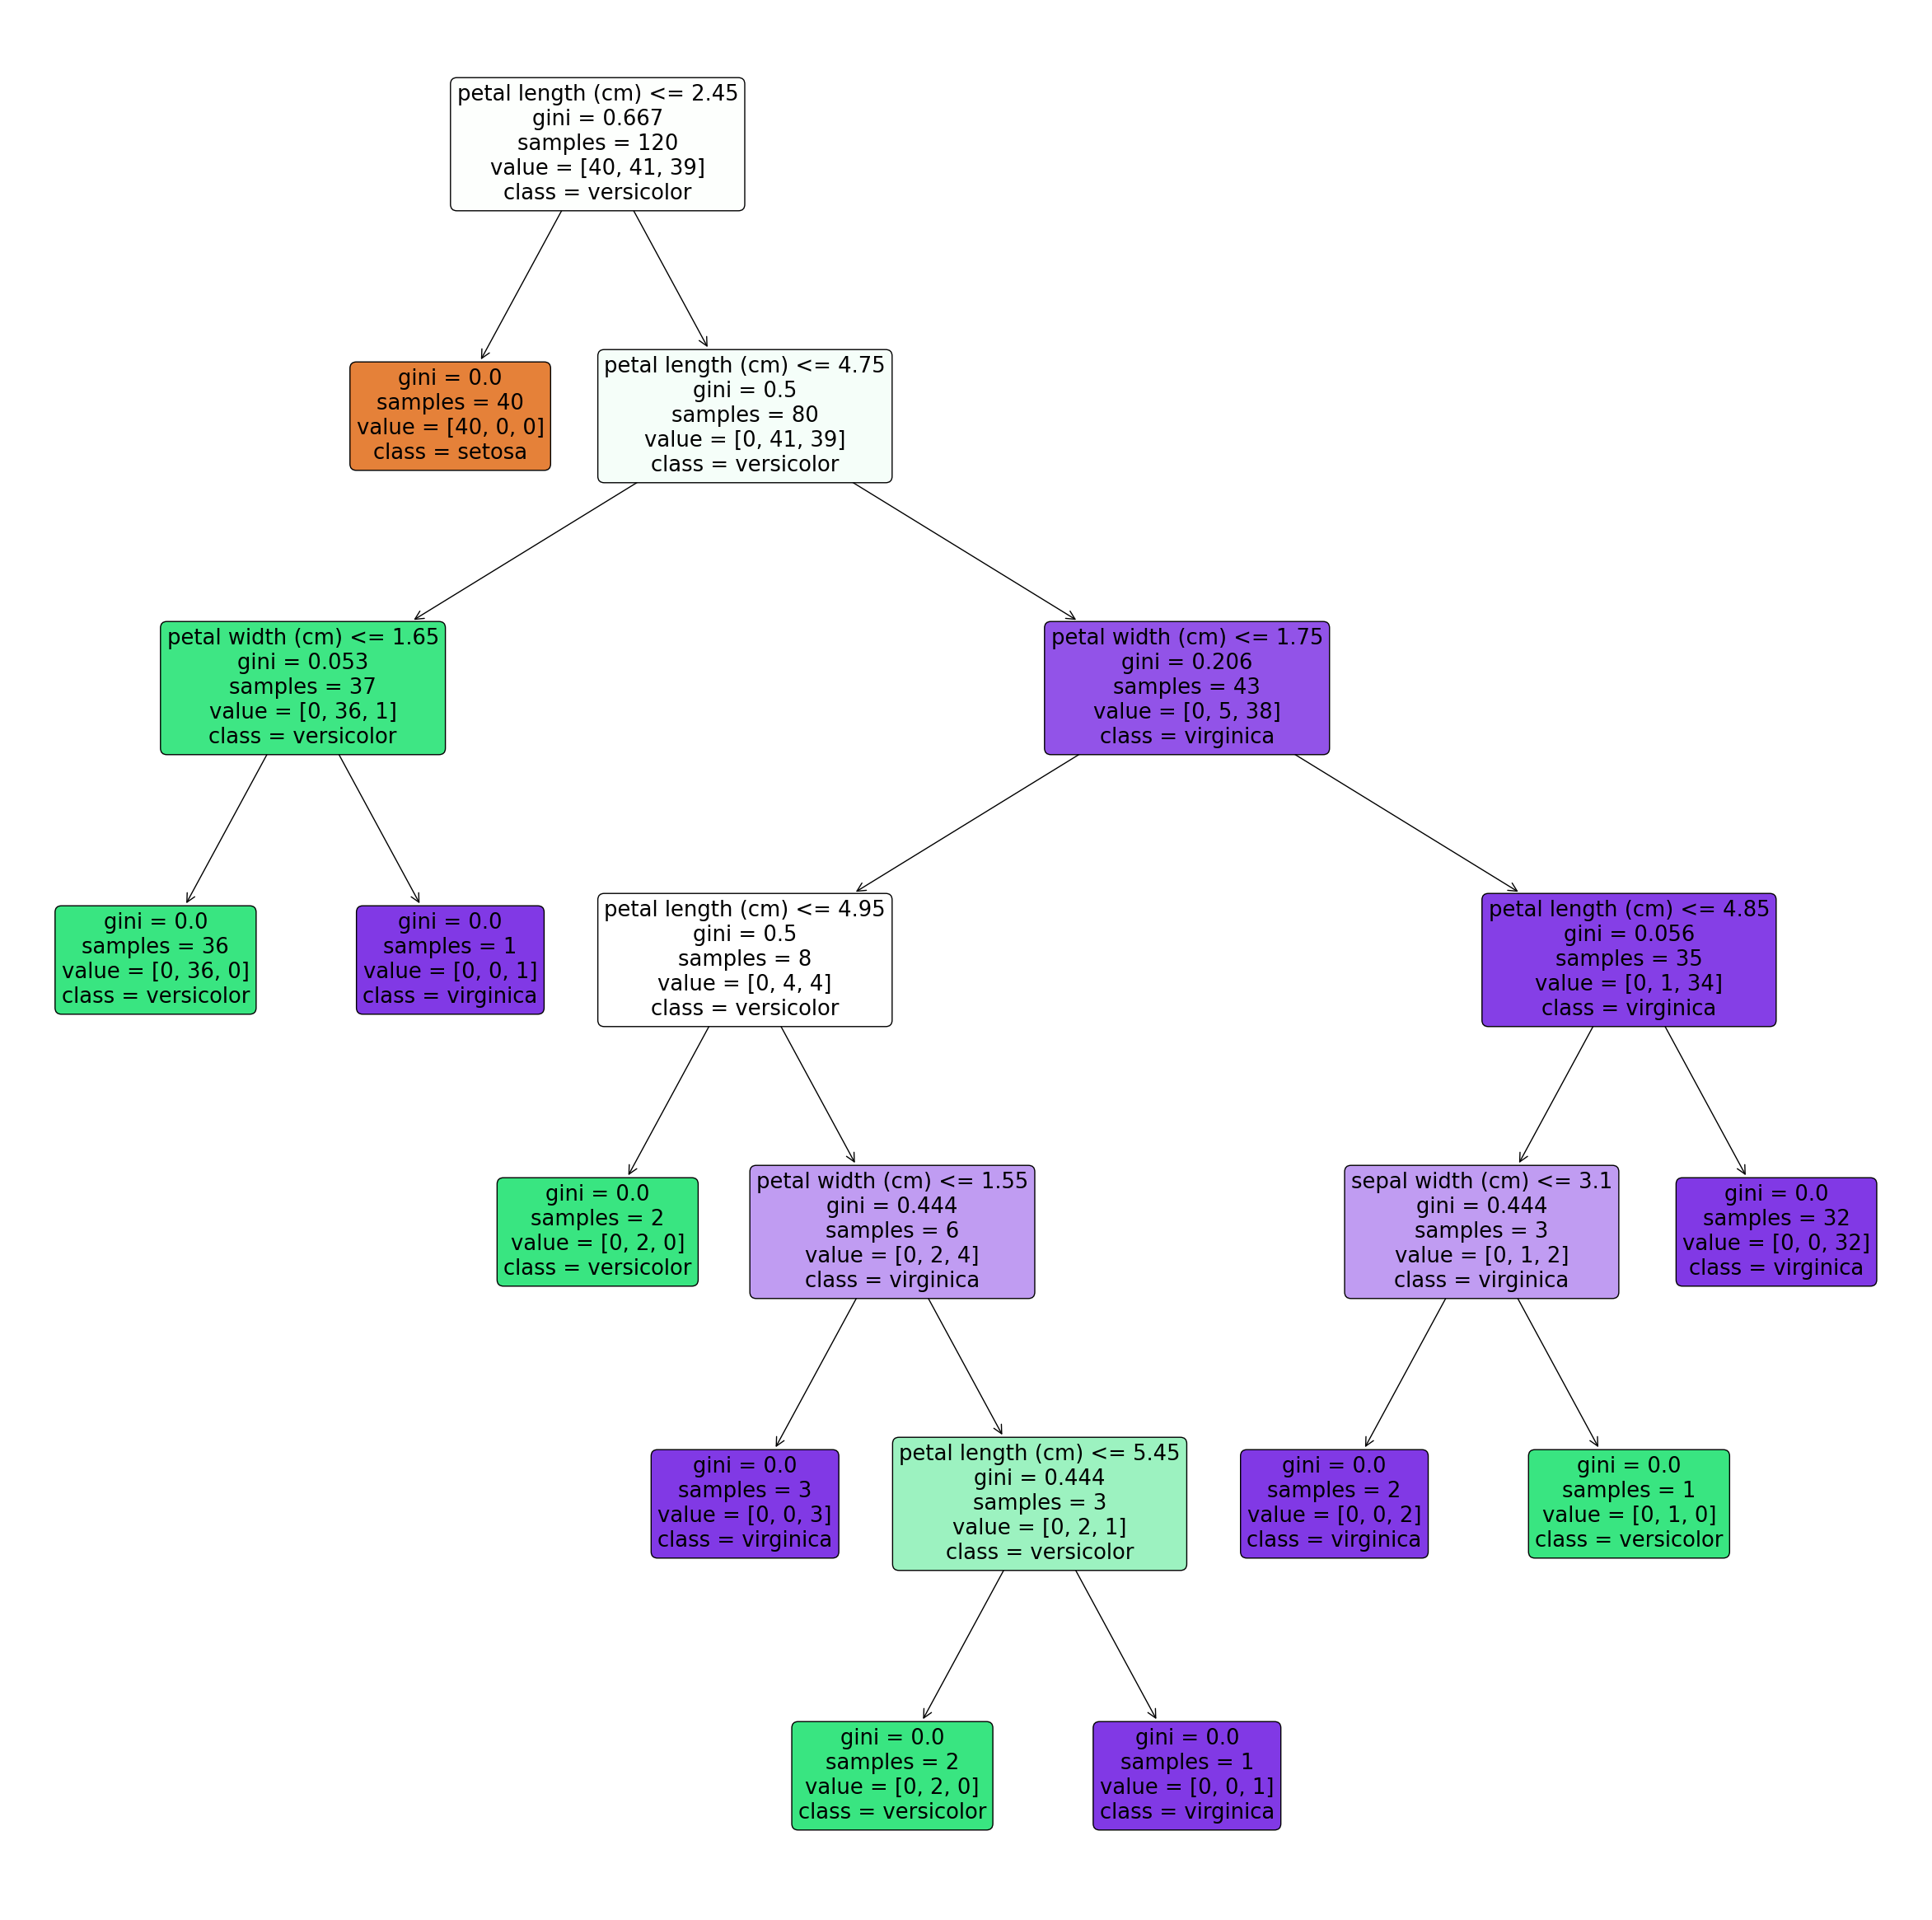

In [10]:

# Prepare the data
iris['species'] = iris_data.target

X = iris.drop(columns=['species'])
y = iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=iris_data.target_names, rounded=True)
plt.show()




In [11]:
from sklearn.tree import export_text

# Export the decision tree to a text representation
text_representation = export_text(clf, feature_names=list(X.columns))
print(text_representation)


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal 

In [12]:
# Predict on a Single New Data Point
new_data = pd.DataFrame({
    'sepal length (cm)': [5.1],
    'sepal width (cm)': [3.5],
    'petal length (cm)': [1.4],
    'petal width (cm)': [0.2]
})

predictions = clf.predict(new_data)
predicted_species = [iris_data.target_names[p] for p in predictions]
print("Prediction for the new data point:", predicted_species)


Prediction for the new data point: ['setosa']


## **Thank You**